# EDA overview
# Load the dataset and run a quick audit: shapes, nulls, types, previews.

In [1]:
%pip install feature-engine


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_name = "BankChurners.csv"
df = pd.read_csv(file_name)

df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
df.shape

(10127, 23)

In [6]:
df. info ()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [7]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [8]:
dup = df.duplicated().sum()

In [9]:
print (dup)

0


# Clustering exercise

## Select behavioural features

In [10]:
features = [
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Revolving_Bal",
    "Avg_Utilization_Ratio"
]

X = df[features]


## Scale

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# KMeans

In [12]:
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)
df["Cluster"] = df["Cluster"] + 1


## PCA for visualisation

In [13]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
df["PC1"] = pca_components[:, 0]
df["PC2"] = pca_components[:, 1]

## Making a scatter plot

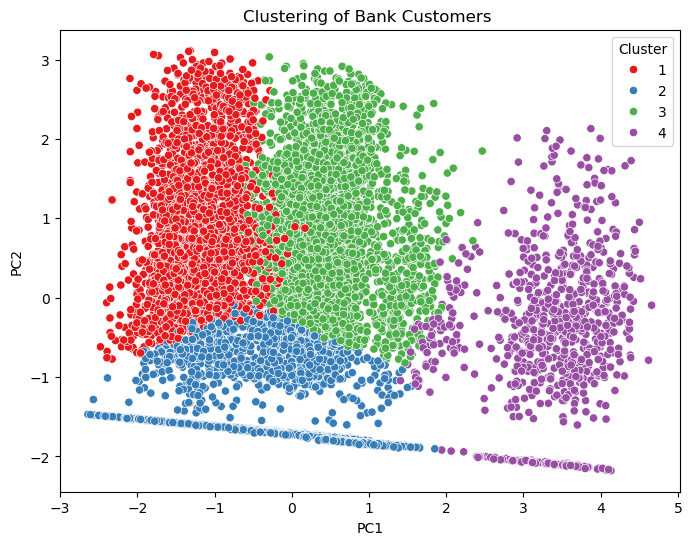

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="PC1",
    y="PC2",
    hue="Cluster",
    palette="Set1"
)
plt.title("Clustering of Bank Customers ")
plt.show()

The heatmap displays the average values of each feture for every cluster. This helps to interpret the behavioural profile of each customer segment. The PCA visualisation demonstrates that clusters form distinct groups in the reduced feature space, suggesting consistent behavioural segmentation. Overlap between some points is expected, but overall cluster structure is well represented
